<a href="https://colab.research.google.com/github/yeray142/AIML_project/blob/master/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - EDA**

This notebook will be use for inspecting the dataset we are going to work with.

## **Setup**

In [1]:
!git clone https://github.com/yeray142/AIML_project

Cloning into 'AIML_project'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 4), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [2]:
cd AIML_project

/content/AIML_project


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/train.csv", index_col=0)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## **Examining the data**

In [4]:
df.shape

(26457, 19)

Most likely we will have to rename some of the columns because of their capitalization. Also, **occyp_type** should be renamed to **occup_type**. And, finally, in order to make it more understandable, we can change the **phone** column by **home_phone**, and **FLAG_MOBIL** should be replaced by **mobile_phone**, just to standarize names.

In [5]:
df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [6]:
df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

There are some nulls values on the **occyp_type** column:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [ ]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26447, 26448, 26449, 26450, 26451, 26452, 26453, 26454, 26455,
            26456],
           dtype='int64', name='index', length=26457)

In [ ]:
df.index.is_unique

True

Most of the users have a low credibility. As we can see on the following plot:

Text(0.5, 1.0, 'Credit variable percentage')

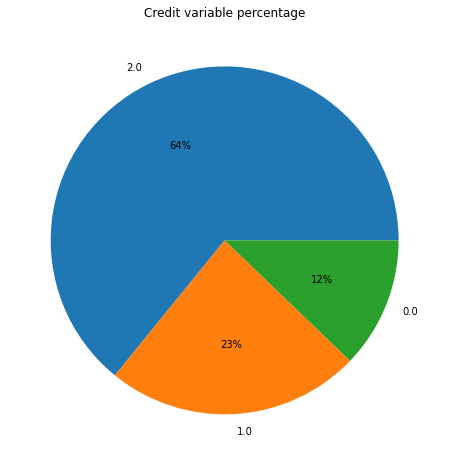

In [29]:
plt.subplots(figsize = (8,8))
plt.pie(df['credit'].value_counts(), labels=df['credit'].value_counts().index, 
        autopct="%i%%")
plt.title('Credit variable percentage')

## **Summarizing the data**

In [ ]:
round(df.describe(), 2)

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.00,26457.00,26457.00,26457.00,26457.0,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00
mean,0.43,187306.52,-15958.05,59068.75,1.0,0.22,0.29,0.09,2.20,-26.12,1.52
std,0.75,101878.37,4201.59,137475.43,0.0,0.42,0.46,0.29,0.92,16.56,0.70
min,0.00,27000.00,-25152.00,-15713.00,1.0,0.00,0.00,0.00,1.00,-60.00,0.00
25%,0.00,121500.00,-19431.00,-3153.00,1.0,0.00,0.00,0.00,2.00,-39.00,1.00
50%,0.00,157500.00,-15547.00,-1539.00,1.0,0.00,0.00,0.00,2.00,-24.00,2.00
75%,1.00,225000.00,-12446.00,-407.00,1.0,0.00,1.00,0.00,3.00,-12.00,2.00
max,19.00,1575000.00,-7705.00,365243.00,1.0,1.00,1.00,1.00,20.00,0.00,2.00


In [ ]:
df.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,18286
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,17697,16410,17830,13645,17995,18196,23653,4512


In [ ]:
df.corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
child_num,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227
begin_month,-0.007229,-0.018047,0.057306,0.007964,NaN,-0.008563,-0.014286,0.002320,-0.023032,1.000000,-0.147477


In [ ]:
df.edu_type.value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
df.family_type.value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
df.house_type.value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
df.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

As you can see, the **FLAG_MOBIL** is completely redundant because it's always 1:

In [ ]:
df.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

We will have to clean DAYS_EMPLOYED data:

In [53]:
df[df['DAYS_EMPLOYED']>=0].head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0


In [54]:
df.loc[(df.DAYS_EMPLOYED)>=0,'DAYS_EMPLOYED'] = 0 # We can fix it by changing all the values greater than 0 into 0.

There's a case where the number of children is higher than the family size.

In [56]:
df.loc[(df['family_size']-df['child_num']) < 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0


## **Handling missing values**

Let's see how many null values there are in our columns:

In [ ]:
df.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

Is this more than 30% of null values on **occyp_type**?

In [ ]:
df.occyp_type.isnull().sum() / df.shape[0] > 0.3

True

In [ ]:
print(str(df.occyp_type.isnull().sum() / df.shape[0] * 100) + "%")

30.884076047926822%


We most likely need to drop this column because it has so many null values.

## **Duplicated values**

Let's see if there are duplicated values:

In [ ]:
df[df.duplicated()].shape

(1634, 19)

In [ ]:
df[df.duplicated(keep=False)].shape

(3155, 19)

As we can see, there are 352 duplicated rows, here you can see the first 5 duplicated ones:

In [ ]:
df[df.duplicated()].head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0


## **Grouping**

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
df.groupby(["gender", "income_type"])["DAYS_BIRTH", "DAYS_EMPLOYED", "begin_month"].describe(percentiles=[])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


DAYS_BIRTH                                      \
                                 count          mean          std      min   
gender income_type                                                           
F      Commercial associate     4026.0 -14807.939146  3340.406348 -24611.0   
       Pensioner                3790.0 -21847.128232  1728.278825 -25140.0   
       State servant            1578.0 -15804.239544  3524.471347 -23395.0   
       Student                     6.0 -16546.333333  3423.200880 -18756.0   
       Working                  8297.0 -15123.057491  3454.265274 -24449.0   
M      Commercial associate     2176.0 -14319.042279  3647.488677 -24247.0   
       Pensioner                 659.0 -21212.972686  2806.951445 -25152.0   
       State servant             576.0 -13121.614583  3290.322981 -24204.0   
       Student                     1.0  -9115.000000          NaN  -9115.0   
       Working                  5348.0 -14316.702880  3516.041556 -23711.0   

                                              DAYS_EMPLOYED                 \
                                 50%      max         count           mean   
gender income_type                                                           
F      Commercial associate -14667.0  -7757.0        4026.0   -2419.413562   
       Pensioner            -21916.0  -8149.0        3790.0  364468.782586   
       State servant        -15885.5  -8189.0        1578.0   -4009.484791   
       Student              -18756.0 -12127.0           6.0   -2867.666667   
       Working              -14867.0  -7959.0        8297.0   -2869.903580   
M      Commercial associate -14143.0  -7723.0        2176.0   -2056.145221   
       Pensioner            -22121.0  -8145.0         659.0  363570.678300   
       State servant        -12394.0  -8190.0         576.0   -2800.932292   
       Student               -9115.0  -9115.0           1.0    -581.000000   
       Working              -14027.0  -7705.0        5348.0   -2274.385378   

                                                                        \
                                      std      min       50%       max   
gender income_type                                                       
F      Commercial associate   2150.167670 -15713.0   -1866.0     -73.0   
       Pensioner             16836.062818  -5521.0  365243.0  365243.0   
       State servant          3108.350102 -15038.0   -3384.5     -88.0   
       Student                1605.480696  -3904.0   -3904.0    -795.0   
       Working                2588.078523 -15072.0   -2087.0     -17.0   
M      Commercial associate   1687.429746  -9485.0   -1646.0     -91.0   
       Pensioner             24748.205212  -3680.0  365243.0  365243.0   
       State servant          1826.174095  -9947.0   -2480.5    -126.0   
       Student                        NaN   -581.0    -581.0    -581.0   
       Working                1943.600787 -14887.0   -1661.0     -70.0   

                            begin_month                                    \
                                  count       mean        std   min   50%   
gender income_type                                                          
F      Commercial associate      4026.0 -26.085445  16.501237 -60.0 -24.0   
       Pensioner                 3790.0 -26.019261  16.838337 -60.0 -24.0   
       State servant             1578.0 -27.112167  16.901129 -60.0 -26.0   
       Student                      6.0 -33.166667  17.926703 -60.0 -37.0   
       Working                   8297.0 -26.187538  16.703568 -60.0 -24.0   
M      Commercial associate      2176.0 -26.247702  16.167165 -60.0 -24.0   
       Pensioner                  659.0 -25.144158  16.338986 -60.0 -23.0   
       State servant              576.0 -27.500000  16.053064 -60.0 -27.0   
       Student                      1.0 -14.000000        NaN -14.0 -14.0   
       Working                   5348.0 -25.750187  16.301043 -60.0 -24.0   

                                 

In [ ]:
pd.crosstab(df["occyp_type"], df["email"], normalize=True)

email,0,1
occyp_type,,
Accountants,0.042546,0.006781
Cleaning staff,0.021109,0.000930
Cooking staff,0.023078,0.001914
Core staff,0.124029,0.020672
Drivers,0.078694,0.007437
HR staff,0.002898,0.000492
High skill tech staff,0.049491,0.007383
IT staff,0.001477,0.000766
Laborers,0.227825,0.018922


As we can see, the credibility score is different depending on the user's gender:

In [34]:
df.groupby(['gender','credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

And how about having a car?

In [36]:
df.groupby(['car','credit'])['credit'].count()

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64

And how about the reality value?

In [37]:
df.groupby(['reality','credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

And the rest?

In [39]:
df.groupby(['family_type', 'credit'])['credit'].count()

family_type           credit
Civil marriage        0.0         288
                      1.0         539
                      2.0        1296
Married               0.0        2213
                      1.0        4140
                      2.0       11843
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64

In [40]:
df.groupby(['income_type', 'credit'])['credit'].count()

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64

Now, let's compare the credit mean with the occupation type:

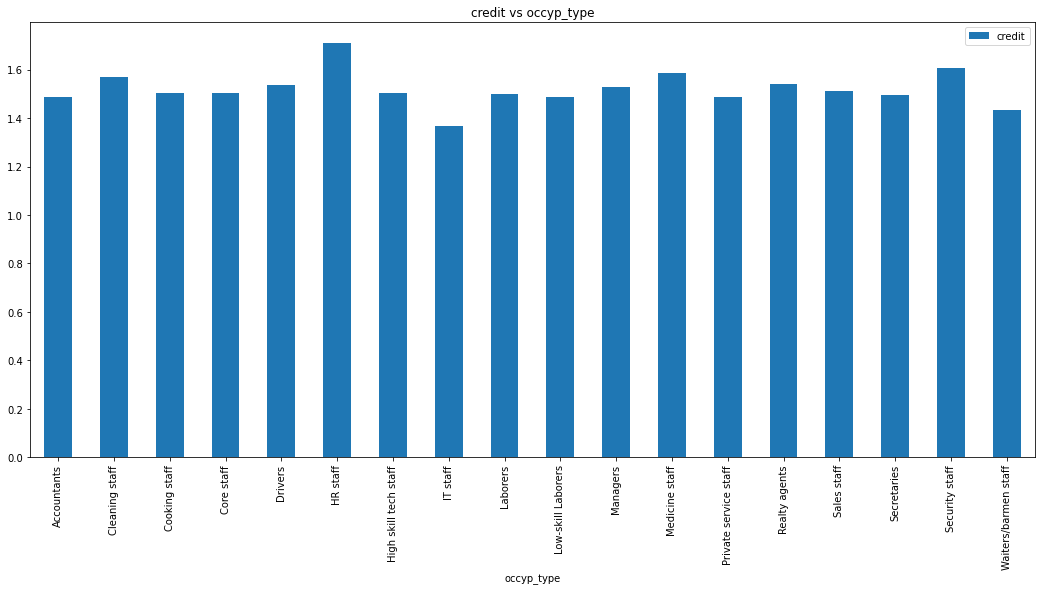

In [41]:
f,ax = plt.subplots(1,1,figsize=(18,8))
df[['occyp_type','credit']].groupby(['occyp_type']).mean().plot.bar(ax=ax)
plt.title('credit vs occyp_type')
plt.show()

In [43]:
df.groupby(['edu_type', 'credit'])['credit'].count()

edu_type                       credit
Academic degree                0.0           2
                               1.0           7
                               2.0          14
Higher education               0.0         909
                               1.0        1751
                               2.0        4502
Incomplete higher              0.0         114
                               1.0         246
                               2.0         660
Lower secondary                0.0          28
                               1.0          59
                               2.0         170
Secondary / secondary special  0.0        2169
                               1.0        4204
                               2.0       11622
Name: credit, dtype: int64

In [45]:
df.groupby(['work_phone', 'credit'])['credit'].count()

work_phone  credit
0           0.0        2493
            1.0        4844
            2.0       13174
1           0.0         729
            1.0        1423
            2.0        3794
Name: credit, dtype: int64

In [46]:
df.groupby(['phone', 'credit'])['credit'].count()

phone  credit
0      0.0        2245
       1.0        4510
       2.0       11917
1      0.0         977
       1.0        1757
       2.0        5051
Name: credit, dtype: int64

In [47]:
df.groupby(['email', 'credit'])['credit'].count()

email  credit
0      0.0        2953
       1.0        5724
       2.0       15365
1      0.0         269
       1.0         543
       2.0        1603
Name: credit, dtype: int64

In [48]:
df.groupby(['family_size', 'credit'])['credit'].count()

family_size  credit
1.0          0.0        605
             1.0       1318
             2.0       3186
2.0          0.0       1720
             1.0       3249
             2.0       9137
3.0          0.0        610
             1.0       1088
             2.0       2934
4.0          0.0        251
             1.0        520
             2.0       1489
5.0          0.0         27
             1.0         74
             2.0        190
6.0          0.0          7
             1.0         12
             2.0         25
7.0          0.0          2
             1.0          6
             2.0          1
9.0          2.0          2
15.0         2.0          3
20.0         2.0          1
Name: credit, dtype: int64